In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#DATA INSERTION

This data is about the tourist visit in THAILAND from year 2010 to 2016. (the data was collected from Google data science platform.   

In [46]:
data = pd.read_excel('/content/drive/MyDrive/DSA WORKS/competiiton/data1.xlsx')

In [41]:
data

,slno,region,nationality,year,month,tourists,days_in_avg,quarter,mode,Spend_in_dollar
0,1,Africa,AfrOthers,2010.0,1,6553.0,8,1,Air,97503.0
1,2,Africa,AfrOthers,2010.0,2,5618.0,7,1,Air,69941.0
2,3,Africa,AfrOthers,2010.0,3,6689.0,8,1,Air,65375.0
3,4,Africa,AfrOthers,2010.0,4,5210.0,8,2,Air,73141.0
4,5,Africa,AfrOthers,2010.0,5,4537.0,6,2,Air,344339.0
...,...,...,...,...,...,...,...,...,...,...
4447,4448,SoAsia,SriLanka,2016.0,8,6040.0,4,3,Air,82369.0
4448,4449,SoAsia,SriLanka,2016.0,9,5221.0,5,3,Air,57644.0
4449,4450,SoAsia,SriLanka,2016.0,10,4285.0,8,4,Air,83150.0
4450,4451,SoAsia,SriLanka,2016.0,11,4808.0,5,4,Air,NaN


In [32]:
data.shape

(4452, 10)

In [33]:
data.dtypes

slno                int64
region             object
nationality        object
year                int64
month               int64
tourists            int64
days_in_avg         int64
quarter             int64
mode               object
Spend_in_dollar     int64
dtype: object

In [34]:
data.describe()

,slno,year,month,tourists,days_in_avg,quarter,Spend_in_dollar
count,4452.000000,4452.000000,4452.00000,4452.000000,4452.000000,4452.00000,4452.000000
mean,2226.500000,2013.000000,6.50000,38545.158805,5.498652,2.50000,75234.463163
std,1285.326029,2.000225,3.45244,72076.012776,1.690564,1.11816,14290.994465
min,1.000000,2010.000000,1.00000,104.000000,3.000000,1.00000,50000.000000
25%,1113.750000,2011.000000,3.75000,5500.500000,4.000000,1.75000,63050.500000
50%,2226.500000,2013.000000,6.50000,14215.500000,5.000000,2.50000,75067.500000
75%,3339.250000,2015.000000,9.25000,49870.750000,7.000000,3.25000,87522.500000
max,4452.000000,2016.000000,12.00000,958204.000000,8.000000,4.00000,99980.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   slno             4452 non-null   int64 
 1   region           4452 non-null   object
 2   nationality      4452 non-null   object
 3   year             4452 non-null   int64 
 4   month            4452 non-null   int64 
 5   tourists         4452 non-null   int64 
 6   days_in_avg      4452 non-null   int64 
 7   quarter          4452 non-null   int64 
 8   mode             4452 non-null   object
 9   Spend_in_dollar  4452 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 347.9+ KB


In [36]:
data.columns


Index(['slno', 'region', 'nationality', 'year', 'month', 'tourists',
       'days_in_avg', 'quarter', 'mode', 'Spend_in_dollar'],
      dtype='object')

#Data Pre-processing

1.Missing value handling

In [47]:
data.isna().sum()

slno                0
region              0
nationality         0
year                6
month               0
tourists           34
days_in_avg         0
quarter             0
mode                0
Spend_in_dollar    25
dtype: int64

In [48]:
data['Spend_in_dollar']=data['Spend_in_dollar'].fillna(data['Spend_in_dollar'].mean())

In [49]:
data['tourists']=data['tourists'].fillna(data['tourists'].mean())

In [51]:
data['year']=data['year'].bfill()

In [52]:
data.isna().sum()

slno               0
region             0
nationality        0
year               0
month              0
tourists           0
days_in_avg        0
quarter            0
mode               0
Spend_in_dollar    0
dtype: int64

removed all null values

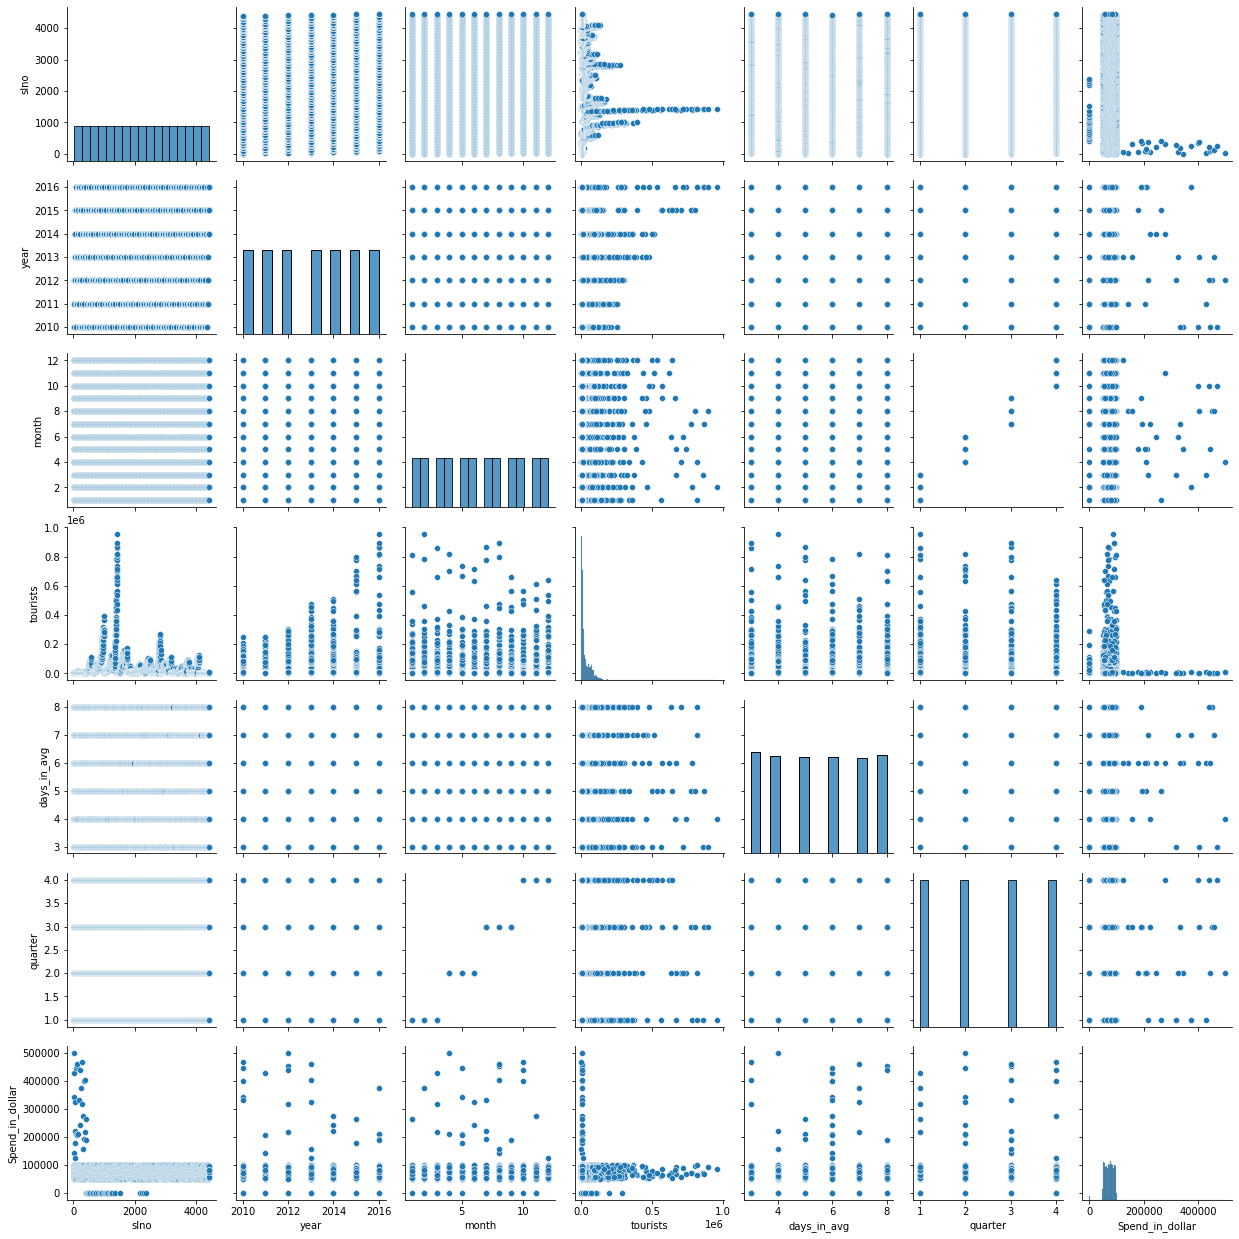

In [53]:
sns.pairplot(data)

2.Outliers detection and handling

{'boxes': [<matplotlib.lines.Line2D at 0x7ffac98d0a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffac98bdc90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffac98d4d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffac98d4210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffac9dbf150>,
  <matplotlib.lines.Line2D at 0x7ffac98bd150>]}

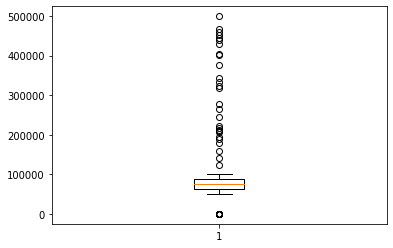

In [54]:
plt.boxplot(data['Spend_in_dollar'])


outliers found


In [55]:
q1=np.percentile(data['Spend_in_dollar'],25,interpolation='midpoint')
q2=np.percentile(data['Spend_in_dollar'],50,interpolation='midpoint')
q3=np.percentile(data['Spend_in_dollar'],75,interpolation='midpoint')
iqr=q3-q1
low_limt=q1-(1.5*iqr)
up_limt=q3+(1.5*iqr)
print('Q1:',q1,'\nQ2:',q2,'\nQ3',q3,'\nIQR:',iqr,'\nLow limit:',low_limt,'\nup limit:',up_limt)


Q1: 62442.5 
Q2: 75130.5 
Q3 87337.5 
IQR: 24895.0 
Low limit: 25100.0 
up limit: 124680.0


In [56]:
outlier=[]
for i in data['Spend_in_dollar']:
  if((i<low_limt)|(i>up_limt)):
    outlier.append(i)
outlier

[344339.0,
 428326.0,
 141104.0,
 499290.0,
 324340.0,
 124770.0,
 222434.0,
 178267.0,
 211746.0,
 445211.0,
 205968.0,
 452392.0,
 459566.0,
 209903.0,
 332422.0,
 440053.0,
 244290.0,
 375112.0,
 468125.0,
 317604.0,
 158649.0,
 276486.0,
 194028.0,
 400292.0,
 216352.0,
 403773.0,
 264921.0,
 190323.0,
 79.0,
 91.0,
 81.0,
 82.0,
 78.0,
 74.0,
 71.0,
 70.0,
 69.0,
 52.0,
 55.0,
 23.0,
 8.0,
 47.0,
 85.0,
 47.0,
 15.0,
 50.0,
 63.0,
 81.0,
 42.0,
 72.0,
 59.0,
 23.0,
 14.0,
 34.0,
 19.0,
 4.0]

In [58]:
for i in outlier:
  data.drop(data[data['Spend_in_dollar']==i].index,inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7ffac99d0ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffac9962d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffac996cdd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffac98c9dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffac99790d0>,
  <matplotlib.lines.Line2D at 0x7ffac9979810>]}

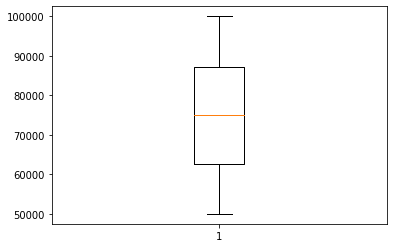

In [60]:
plt.boxplot(data['Spend_in_dollar'])

)removed oulier in spend

{'boxes': [<matplotlib.lines.Line2D at 0x7ffaca86a950>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffac98e14d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffac970dcd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffac970d790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffacb067310>,
  <matplotlib.lines.Line2D at 0x7ffac98e1d10>]}

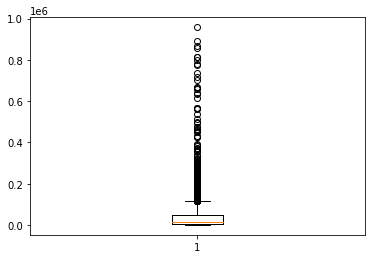

In [61]:
plt.boxplot(data['tourists'])

In [70]:
q1=np.percentile(data['tourists'],25,interpolation='midpoint')
q2=np.percentile(data['tourists'],50,interpolation='midpoint')
q3=np.percentile(data['tourists'],75,interpolation='midpoint')
iqr=q3-q1
low_limt=q1-(1.5*iqr)
up_limt=q3+(1.5*iqr)
print('Q1:',q1,'\nQ2:',q2,'\nQ3',q3,'\nIQR:',iqr,'\nLow limit:',low_limt,'\nup limit:',up_limt)

Q1: 5168.5 
Q2: 12096.5 
Q3 36174.5 
IQR: 31006.0 
Low limit: -41340.5 
up limit: 82683.5


In [71]:
outlier=[]
for i in data['tourists']:
  if((i<low_limt)|(i>up_limt)):
    outlier.append(i)
outlier

[85306.0,
 90113.0,
 90695.0,
 88725.0,
 87174.0,
 83125.0,
 85247.0,
 86635.0,
 86360.0,
 86162.0,
 84483.0,
 90150.0,
 83985.0,
 83505.0,
 86613.0,
 86503.0,
 89340.0,
 85491.0,
 91251.0,
 90066.0,
 82834.0,
 87314.0,
 83510.0,
 88136.0,
 88316.0,
 87193.0,
 86678.0,
 87077.0,
 89978.0,
 82925.0,
 90223.0,
 84475.0,
 85538.0,
 87790.0,
 88887.0,
 89587.0,
 88678.0,
 89463.0,
 89031.0,
 84266.0,
 84569.0,
 88950.0,
 89189.0,
 91160.0,
 86307.0,
 89584.0,
 83295.0,
 89826.0,
 85145.0,
 88122.0,
 88615.0,
 88931.0,
 86428.0,
 86587.0,
 88373.0,
 89638.0,
 88275.0,
 84485.0,
 85237.0,
 90883.0,
 84157.0,
 85333.0,
 87716.0,
 90496.0,
 83652.0,
 84826.0,
 85771.0,
 89495.0,
 85023.0,
 86755.0,
 82892.0,
 86563.0,
 86028.0,
 86747.0,
 83416.0,
 88932.0,
 83934.0,
 85050.0,
 84973.0,
 83946.0,
 83631.0,
 89673.0,
 83237.0,
 86559.0,
 86714.0,
 84400.0,
 90195.0,
 87057.0,
 89518.0,
 84999.0,
 86461.0,
 83495.0,
 90508.0,
 85653.0,
 90034.0,
 84610.0,
 89339.0,
 89339.0,
 90053.0,
 91248.0,


In [72]:
for i in outlier:
  data.drop(data[data['tourists']==i].index,inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7ffac95e3f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffac95ecf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffac9573fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffac9573a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffac95ec510>,
  <matplotlib.lines.Line2D at 0x7ffac95eca50>]}

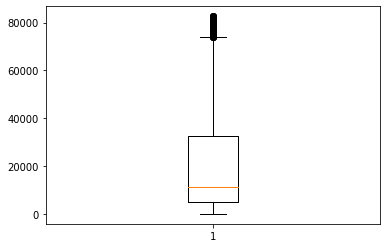

In [73]:
plt.boxplot(data['tourists'])

{'boxes': [<matplotlib.lines.Line2D at 0x7ffac954ce90>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffac9552f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffac9559f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffac9559a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffac9552490>,
  <matplotlib.lines.Line2D at 0x7ffac95529d0>]}

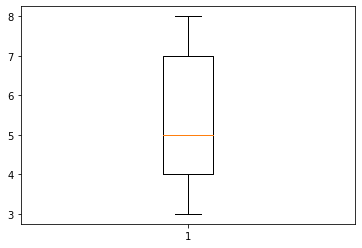

In [74]:
plt.boxplot(data['days_in_avg'])

no outliers

In [75]:
data.shape

(3906, 10)

In [76]:
data

,slno,region,nationality,year,month,tourists,days_in_avg,quarter,mode,Spend_in_dollar
0,1,Africa,AfrOthers,2010.0,1,6553.0,8,1,Air,97503.000000
1,2,Africa,AfrOthers,2010.0,2,5618.0,7,1,Air,69941.000000
2,3,Africa,AfrOthers,2010.0,3,6689.0,8,1,Air,65375.000000
3,4,Africa,AfrOthers,2010.0,4,5210.0,8,2,Air,73141.000000
5,6,Africa,AfrOthers,2010.0,6,4683.0,5,2,Air,61025.000000
...,...,...,...,...,...,...,...,...,...,...
4447,4448,SoAsia,SriLanka,2016.0,8,6040.0,4,3,Air,82369.000000
4448,4449,SoAsia,SriLanka,2016.0,9,5221.0,5,3,Air,57644.000000
4449,4450,SoAsia,SriLanka,2016.0,10,4285.0,8,4,Air,83150.000000
4450,4451,SoAsia,SriLanka,2016.0,11,4808.0,5,4,Air,75906.981026


#Exploratory data analysis  

1.Univariate analysis

Text(0, 0.5, 'Count')

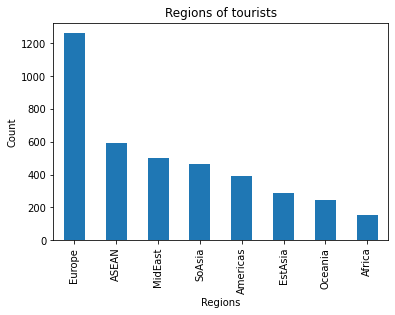

In [81]:
data['region'].value_counts().plot(kind='bar')
plt.title('Regions of tourists')
plt.xlabel('Regions')
plt.ylabel('Count')

2.bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Day spend')

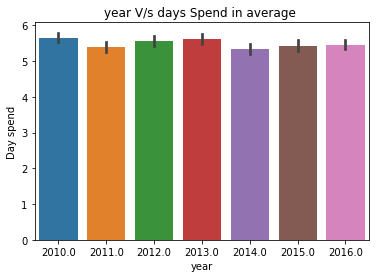

In [96]:
sns.barplot(data['year'],data['days_in_avg'])
plt.title('year V/s days Spend in average ')
plt.xlabel('year')
plt.ylabel('Day spend')

year
2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
2011.0    AxesSubplot(0.125,0.125;0.775x0.755)
2012.0    AxesSubplot(0.125,0.125;0.775x0.755)
2013.0    AxesSubplot(0.125,0.125;0.775x0.755)
2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
2015.0    AxesSubplot(0.125,0.125;0.775x0.755)
2016.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tourists, dtype: object

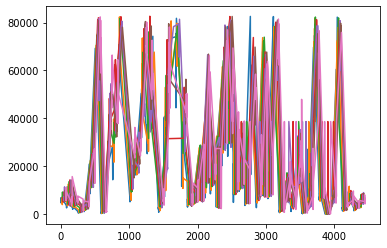

In [102]:
data.groupby('year')['tourists'].plot()

Text(0, 0.5, 'Spend')

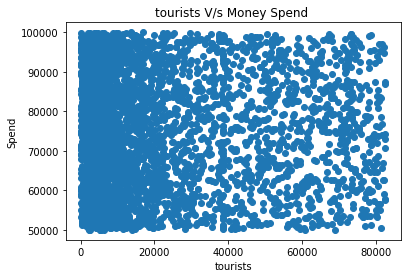

In [107]:
plt.scatter(data['tourists'],data['Spend_in_dollar'])
plt.title('tourists V/s Money Spend ')
plt.xlabel('tourists')
plt.ylabel('Spend')

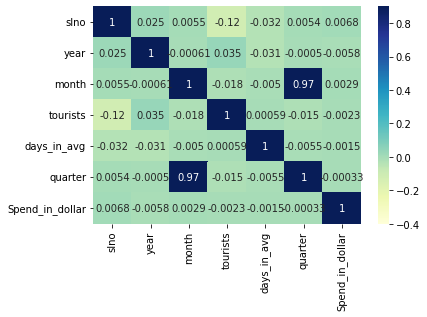

In [108]:
corrmatrix=data.corr()
plt.subplot()
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,cmap='YlGnBu')

**Feature reduction**

In [110]:
data.drop(['slno','quarter','mode'],axis=1)

,region,nationality,year,month,tourists,days_in_avg,Spend_in_dollar
0,Africa,AfrOthers,2010.0,1,6553.0,8,97503.000000
1,Africa,AfrOthers,2010.0,2,5618.0,7,69941.000000
2,Africa,AfrOthers,2010.0,3,6689.0,8,65375.000000
3,Africa,AfrOthers,2010.0,4,5210.0,8,73141.000000
5,Africa,AfrOthers,2010.0,6,4683.0,5,61025.000000
...,...,...,...,...,...,...,...
4447,SoAsia,SriLanka,2016.0,8,6040.0,4,82369.000000
4448,SoAsia,SriLanka,2016.0,9,5221.0,5,57644.000000
4449,SoAsia,SriLanka,2016.0,10,4285.0,8,83150.000000
4450,SoAsia,SriLanka,2016.0,11,4808.0,5,75906.981026


**Encoding**

In [111]:
data=pd.get_dummies(data)

In [112]:
data

,slno,year,month,tourists,days_in_avg,quarter,Spend_in_dollar,region_ASEAN,region_Africa,region_Americas,region_EstAsia,region_Europe,region_MidEast,region_Oceania,region_SoAsia,nationality_AfrOthers,nationality_AmOthers,nationality_Argentina,nationality_Australia,nationality_Austria,nationality_Bangladesh,nationality_Belgium,nationality_Brazil,nationality_Brunei,nationality_Cambodia,nationality_Canada,nationality_China,nationality_Denmark,nationality_EAOthers,nationality_EastEurope,nationality_Egypt,nationality_EuOthers,nationality_Finland,nationality_France,nationality_Germany,nationality_HongKong,nationality_India,nationality_Indonesia,nationality_Israel,nationality_Italy,nationality_Japan,nationality_Korea,nationality_Kuwait,nationality_Laos,nationality_MEOthers,nationality_Myanmar,nationality_Nepal,nationality_Netherlands,nationality_NewZealand,nationality_Norway,nationality_OcOthers,nationality_Pakistan,nationality_Philippines,nationality_Russia,nationality_SAOthers,nationality_SaudiArabia,nationality_Singapore,nationality_SoAfrica,nationality_Spain,nationality_SriLanka,nationality_Sweden,nationality_Switzerland,nationality_Taiwan,nationality_UAE,nationality_USA,nationality_UnitedKingdom,nationality_Vietnam,mode_Air
0,1,2010.0,1,6553.0,8,1,97503.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2010.0,2,5618.0,7,1,69941.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,2010.0,3,6689.0,8,1,65375.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2010.0,4,5210.0,8,2,73141.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,2010.0,6,4683.0,5,2,61025.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,4448,2016.0,8,6040.0,4,3,82369.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4448,4449,2016.0,9,5221.0,5,3,57644.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4449,4450,2016.0,10,4285.0,8,4,83150.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4450,4451,2016.0,11,4808.0,5,4,75906.981026,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


#Modelling

In [118]:
y=data['tourists']
x=data.drop('tourists',axis=1)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [120]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 76414094.8594224


In [122]:
from sklearn.metrics import r2_score
print('R Squared value is :',r2_score(y_test,predictions))

R Squared value is : 0.8472622786961003


#Model fine tuning 

In [123]:
x.describe()

,slno,year,month,days_in_avg,quarter,Spend_in_dollar,region_ASEAN,region_Africa,region_Americas,region_EstAsia,region_Europe,region_MidEast,region_Oceania,region_SoAsia,nationality_AfrOthers,nationality_AmOthers,nationality_Argentina,nationality_Australia,nationality_Austria,nationality_Bangladesh,nationality_Belgium,nationality_Brazil,nationality_Brunei,nationality_Cambodia,nationality_Canada,nationality_China,nationality_Denmark,nationality_EAOthers,nationality_EastEurope,nationality_Egypt,nationality_EuOthers,nationality_Finland,nationality_France,nationality_Germany,nationality_HongKong,nationality_India,nationality_Indonesia,nationality_Israel,nationality_Italy,nationality_Japan,nationality_Korea,nationality_Kuwait,nationality_Laos,nationality_MEOthers,nationality_Myanmar,nationality_Nepal,nationality_Netherlands,nationality_NewZealand,nationality_Norway,nationality_OcOthers,nationality_Pakistan,nationality_Philippines,nationality_Russia,nationality_SAOthers,nationality_SaudiArabia,nationality_Singapore,nationality_SoAfrica,nationality_Spain,nationality_SriLanka,nationality_Sweden,nationality_Switzerland,nationality_Taiwan,nationality_UAE,nationality_USA,nationality_UnitedKingdom,nationality_Vietnam,mode_Air
count,3906.000000,3906.00000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.00000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.00000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.0
mean,2300.137225,2012.93062,6.475166,5.492832,2.493088,74951.436401,0.152586,0.039427,0.100102,0.074245,0.323093,0.129032,0.062212,0.119304,0.019201,0.020481,0.020225,0.019201,0.021505,0.021505,0.021505,0.019969,0.020993,0.020993,0.020737,0.00128,0.021505,0.021505,0.021505,0.021505,0.020993,0.021249,0.020481,0.018689,0.020737,0.011777,0.021249,0.021505,0.021505,0.00256,0.006656,0.021505,0.010497,0.021505,0.020993,0.021505,0.021505,0.021505,0.021505,0.021505,0.021505,0.020993,0.010753,0.021505,0.021505,0.016897,0.020225,0.021505,0.021505,0.021505,0.021505,0.021505,0.021505,0.018689,0.015873,0.019969,1.0
std,1303.901937,2.00206,3.426346,1.719386,1.111494,14304.805673,0.359634,0.194632,0.300175,0.262202,0.467718,0.335279,0.241571,0.324187,0.137249,0.141658,0.140788,0.137249,0.145080,0.145080,0.145080,0.139913,0.143380,0.143380,0.142522,0.03576,0.145080,0.145080,0.145080,0.145080,0.143380,0.144233,0.141658,0.135442,0.142522,0.107894,0.144233,0.145080,0.145080,0.05054,0.081325,0.145080,0.101927,0.145080,0.143380,0.145080,0.145080,0.145080,0.145080,0.145080,0.145080,0.143380,0.103149,0.145080,0.145080,0.128902,0.140788,0.145080,0.145080,0.145080,0.145080,0.145080,0.145080,0.135442,0.125000,0.139913,0.0
min,1.000000,2010.00000,1.000000,3.000000,1.000000,50003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1156.250000,2011.00000,4.000000,4.000000,2.000000,62659.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [124]:
type(x)

pandas.core.frame.DataFrame

In [125]:
from sklearn import preprocessing

In [126]:
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)

In [127]:
x=pd.DataFrame(x)

In [128]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
count,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3.906000e+03,3906.0
mean,4.949105e-16,-2.000505e-14,9.664000e-19,9.347362e-16,-2.007838e-16,-9.166872e-16,-6.334667e-15,2.768352e-15,-1.738755e-14,-7.220941e-15,4.083608e-15,-1.424749e-14,-6.105374e-15,7.780998e-15,9.096837e-15,1.245617e-14,2.932242e-15,7.175861e-15,-7.459613e-16,-6.594387e-15,-1.492946e-16,-1.078900e-15,2.663683e-15,2.358073e-15,-3.513191e-15,6.973286e-16,4.473721e-16,-2.783360e-15,1.044039e-15,-2.899783e-15,-4.729164e-15,-2.375695e-15,4.791781e-16,5.036123e-15,7.070068e-16,2.315118e-15,-2.521266e-15,-3.496449e-15,1.355802e-15,-1.574322e-15,-1.165301e-15,-4.100392e-15,-1.099209e-16,-4.697059e-15,1.630430e-15,-7.307476e-15,8.257461e-16,-5.766736e-15,2.279567e-16,-6.204402e-15,-7.604033e-15,1.193845e-15,3.806543e-15,-8.157908e-15,-4.900842e-15,-1.989249e-15,7.784210e-16,-6.670434e-16,-8.590272e-15,-1.263710e-15,-1.866530e-15,-1.138931e-15,-5.341023e-15,5.225310e-15,-3.685281e-15,-1.078900e-15,0.0
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,0.0
min,-1.763500e+00,-1.463989e+00,-1.598166e+00,-1.450024e+00,-1.343488e+00,-1.744283e+00,-4.243353e-01,-2.025951e-01,-3.335229e-01,-2.831945e-01,-6.908742e-01,-3.849002e-01,-2.575637e-01,-3.680559e-01,-1.399183e-01,-1.446014e-01,-1.436760e-01,-1.399183e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.427451e-01,-1.464360e-01,-1.464360e-01,-1.455214e-01,-3.580115e-02,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.464360e-01,-1.473455e-01,-1.446014e-01,-1.380041e-01,-1.455214e-01,-1.091655e-01,-1.473455e-01,-1.482499e-01,-1.482499e-01,-5.066296e-02,-8.185982e-02,-1.482499e-01,-1.029952e-01,-1.482499e-01,-1.464360e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.464360e-01,-1.042572e-01,-1.482499e-01,-1.482499e-01,-1.311011e-01,-1.436760e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.482499e-01,-1.380041e-01,-1.270001e-01,-1.427451e-01,0.0
25%,-8.773924e-01,-9.644399e-01,-7.224850e-01,-8.683467e-01,-4.436826e-01,-8.593972e-01,-4.243353e-01,-2.025951e-01,-3.335229e-01,-2.831945e-01,-6.908742e-01,-3.849002e-01,-2.575637e-01,-3.680559e-01,-1.399183e-01,-1.446014e-01,-1.43

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [130]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [131]:
print('MSE is:',mean_squared_error(y_test,predictions))
print('R Squared value is :',r2_score(y_test,predictions))

MSE is: 77051067.45362169
R Squared value is : 0.845989087634294
